# The `pyml` Library: Build 1 Showcase

This notebook is a comprehensive demonstration of a complete Machine Learning framework built from scratch.

We will walk through every major component, from preprocessing to advanced ensemble models and even our own neural network engine.

**Note:** We will use `scikit-learn` for two things *only*:
1.  Loading standard, real-world datasets (e.g., Iris, MNIST).
2.  Comparing our final model scores (as a sanity check).

All models, metrics, and preprocessing tools will come *exclusively* from our `pyml` library.

## 1. Setup & Imports

First, let's import all the tools we've built, along with our data/plotting libraries.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris, load_diabetes, load_breast_cancer, fetch_openml

from pyml.model_selection import train_test_split

from pyml.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from pyml.decomposition import PCA

from pyml.metrics import accuracy_score, r2_score, mean_squared_error
from pyml.metrics import precision_score, recall_score, f1_score

from pyml.neighbors import KNeighborsClassifier
from pyml.linear_model import LogisticRegression
from pyml.svm import LinearSVC
from pyml.naive_bayes import GaussianNB, MultinomialNB
from pyml.tree import DecisionTreeClassifier

from pyml.linear_model import LinearRegression
from pyml.tree import DecisionTreeRegressor

from pyml.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

from pyml.cluster import KMeans, DBSCAN

from pyml.neural_network import Sequential, Dense, ActivationLayer, Flatten
from pyml.neural_network._activations import ReLU, Tanh
from pyml.neural_network._losses import SoftmaxCrossEntropyLoss, MeanSquaredError
from pyml.neural_network._optimizers import Adam, SGD

print("pyml library and all dependencies loaded successfully!")

pyml library and all dependencies loaded successfully!


## 2. Preprocessing & Dimensionality Reduction (PCA)

Let's start by testing our `StandardScaler`, `MinMaxScaler`, and `PCA` implementation on the classic Iris dataset.

In [ ]:
X_iris, y_iris = load_iris(return_X_y=True)

scaler_std = StandardScaler()
X_scaled_std = scaler_std.fit_transform(X_iris)

scaler_minmax = MinMaxScaler(feature_range=(0, 1))
X_scaled_minmax = scaler_minmax.fit_transform(X_iris)

print(f"Original data mean (first feature):    {X_iris[:, 0].mean():.2f}")
print(f"StandardScaler mean (first feature): {X_scaled_std[:, 0].mean():.2f}")
print(f"MinMaxScaler min (first feature):    {X_scaled_minmax[:, 0].min():.2f}")
print(f"MinMaxScaler max (first feature):    {X_scaled_minmax[:, 0].max():.2f}")

Original data mean (first feature):    5.84
StandardScaler mean (first feature): -0.00
MinMaxScaler min (first feature):    0.00
MinMaxScaler max (first feature):    1.00


Original shape: (150, 4)
PCA-transformed shape: (150, 2)


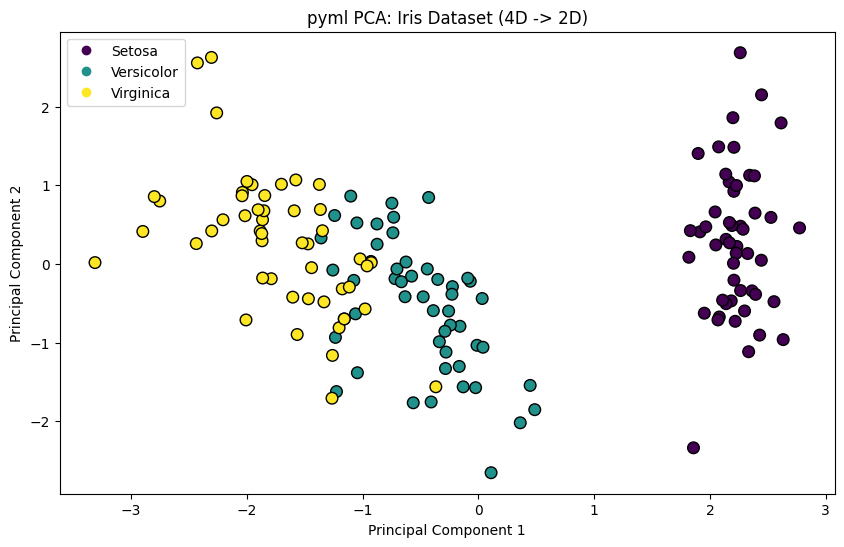

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled_std)

print(f"Original shape: {X_scaled_std.shape}")
print(f"PCA-transformed shape: {X_pca.shape}")

plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_iris, cmap='viridis', edgecolor='k', s=70)
plt.title('pyml PCA: Iris Dataset (4D -> 2D)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(handles=scatter.legend_elements()[0], labels=['Setosa', 'Versicolor', 'Virginica'])
plt.show()

## 3. Supervised Learning: Regression

Let's test our `LinearRegression` and `DecisionTreeRegressor` on the Diabetes dataset. We'll use our own `train_test_split`, `StandardScaler`, and regression metrics.

In [ ]:
X_diag, y_diag = load_diabetes(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X_diag, y_diag, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training samples: {X_train_scaled.shape[0]}, Test samples: {X_test_scaled.shape[0]}")

Training samples: 354, Test samples: 88


In [ ]:
lin_reg = LinearRegression(learning_rate=0.01, n_iterations=1000)
lin_reg.fit(X_train_scaled, y_train)
y_pred_lin_reg = lin_reg.predict(X_test_scaled)

tree_reg = DecisionTreeRegressor(max_depth=5)
tree_reg.fit(X_train_scaled, y_train)
y_pred_tree_reg = tree_reg.predict(X_test_scaled)

print("--- pyml Regression Results ---")
print(f"Linear Regression R2:   {r2_score(y_test, y_pred_lin_reg):.3f}")
print(f"Decision Tree R2:       {r2_score(y_test, y_pred_tree_reg):.3f}")
print(f"Linear Regression MSE:  {mean_squared_error(y_test, y_pred_lin_reg):.3f}")
print(f"Decision Tree MSE:      {mean_squared_error(y_test, y_pred_tree_reg):.3f}")

--- pyml Regression Results ---
Linear Regression R2:   0.400
Decision Tree R2:       0.079
Linear Regression MSE:  3354.455
Decision Tree MSE:      5145.498


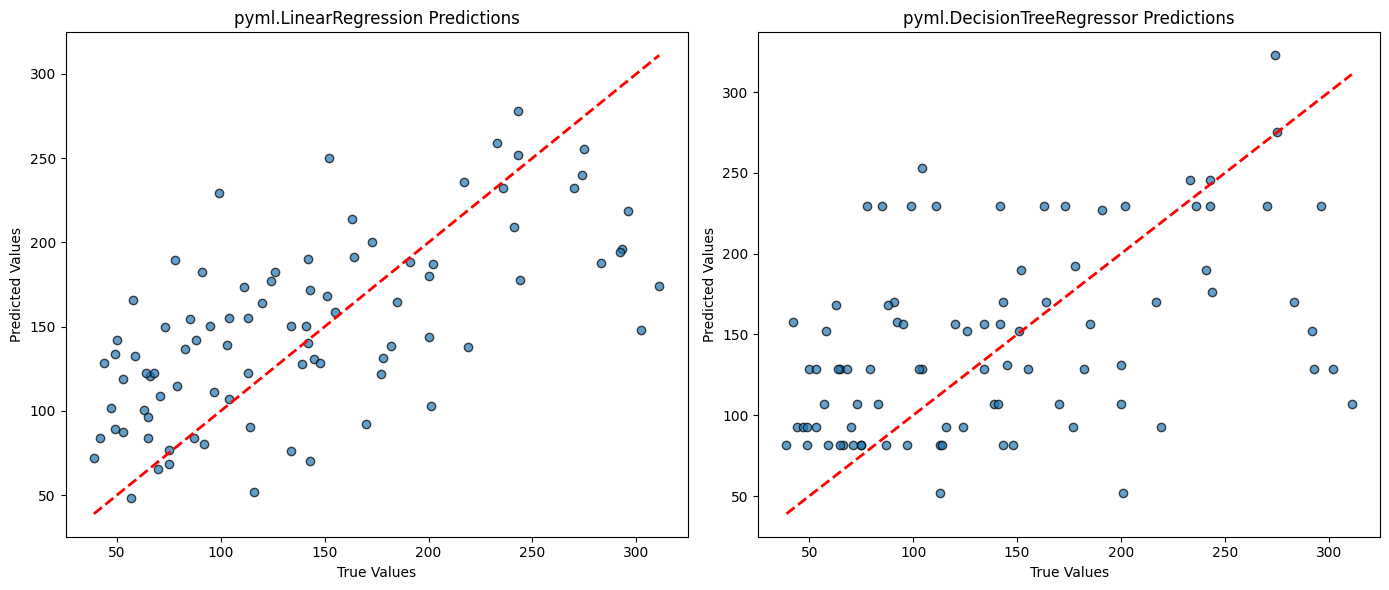

In [ ]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_lin_reg, alpha=0.7, edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('pyml.LinearRegression Predictions')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_tree_reg, alpha=0.7, edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('pyml.DecisionTreeRegressor Predictions')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')

plt.tight_layout()
plt.show()

## 4. Supervised Learning: Classification

This is a major test. We will run our *entire* suite of classifiers on the Breast Cancer dataset (a binary classification problem) and compare their performance.

In [ ]:
X_bc, y_bc = load_breast_cancer(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X_bc, y_bc, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training samples: {X_train_scaled.shape[0]}, Test samples: {X_test_scaled.shape[0]}")

Training samples: 456, Test samples: 113


In [ ]:
models = {
    "KNeighborsClassifier": KNeighborsClassifier(n_neighbors=5),
    "LogisticRegression": LogisticRegression(learning_rate=0.01, n_iterations=1000),
    "LinearSVC (SVM)": LinearSVC(learning_rate=0.001, n_iterations=1000, C=1.0),
    "GaussianNB": GaussianNB(),
    "DecisionTree": DecisionTreeClassifier(max_depth=5),
    "RandomForest": RandomForestClassifier(n_estimators=10, max_depth=5, random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=50, random_state=42),
    "GradientBoosting": GradientBoostingClassifier(n_estimators=50, learning_rate=0.1, max_depth=3, random_state=42)
}

print("--- pyml Classification Results ---")
print("Training all models...")

results = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    results[name] = (acc, f1)

print("\nModel Performance (Breast Cancer Dataset):")
print("-" * 40)
print(f"{'Model':<25} | {'Accuracy':<10} | {'F1-Score':<10}")
print("-" * 40)
for name, (acc, f1) in sorted(results.items(), key=lambda item: item[1][0], reverse=True):
    print(f"{name:<25} | {acc:<10.3f} | {f1:<10.3f}")


--- pyml Classification Results ---
Training all models...


/Users/gopo/Quant Projects/ML_LIB/pyml/naive_bayes/_gaussian.py:39: RuntimeWarning: divide by zero encountered in log
  log_pdf = np.sum(np.log(numerator / denominator), axis=1)



Model Performance (Breast Cancer Dataset):
----------------------------------------
Model                     | Accuracy   | F1-Score  
----------------------------------------
LogisticRegression        | 0.965      | 0.971     
LinearSVC (SVM)           | 0.947      | 0.957     
DecisionTree              | 0.947      | 0.956     
RandomForest              | 0.947      | 0.957     
AdaBoost                  | 0.938      | 0.950     
GradientBoosting          | 0.938      | 0.950     
KNeighborsClassifier      | 0.929      | 0.943     
GaussianNB                | 0.929      | 0.942     


## 5. Unsupervised Learning: Clustering

Let's test our `KMeans` and `DBSCAN` clustering algorithms. We'll use the 2D PCA-transformed Iris data we created in Section 2, as it's easy to visualize.

In [9]:
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)
kmeans.fit(X_pca)                     
y_pred_kmeans = kmeans.labels_        

dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(X_pca)
y_pred_dbscan = dbscan.labels_         

print("Clustering complete.")
print(f"KMeans found clusters: {np.unique(y_pred_kmeans)}")
print(f"DBSCAN found clusters: {np.unique(y_pred_dbscan)}")

Clustering complete.
KMeans found clusters: [0 1 2]
DBSCAN found clusters: [-1  0  1]


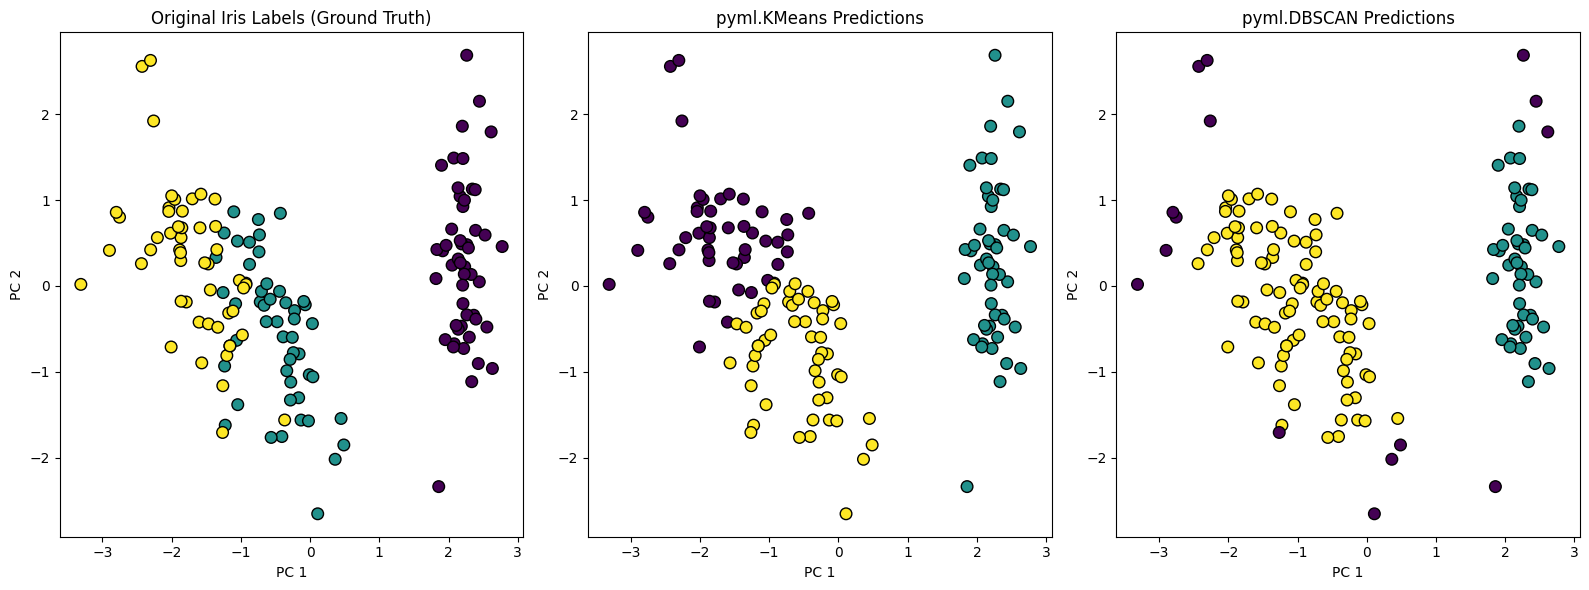

In [10]:
plt.figure(figsize=(16, 6))

plt.subplot(1, 3, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_iris, cmap='viridis', edgecolor='k', s=70)
plt.title('Original Iris Labels (Ground Truth)')
plt.xlabel('PC 1')
plt.ylabel('PC 2')

plt.subplot(1, 3, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred_kmeans, cmap='viridis', edgecolor='k', s=70)
plt.title('pyml.KMeans Predictions')
plt.xlabel('PC 1')
plt.ylabel('PC 2')

plt.subplot(1, 3, 3)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred_dbscan, cmap='viridis', edgecolor='k', s=70)
plt.title('pyml.DBSCAN Predictions')
plt.xlabel('PC 1')
plt.ylabel('PC 2')

plt.tight_layout()
plt.show()

## 6. The `pyml` Neural Network Engine (MLPs)

This is the final and most complex part of our library. Our `pyml.neural_network` module is a "from-scratch" implementation of a **Multi-Layer Perceptron (MLP)** framework. It includes:

* `Sequential` model API
* `Dense` (fully-connected) layers
* `ActivationLayer`s (like `ReLU` and `Tanh`)
* `Flatten` layer
* Loss functions (`SoftmaxCrossEntropyLoss`, `MeanSquaredError`)
* Optimizers (`Adam`, `SGD`)

This allows us to build powerful, deep, fully-connected networks.



### NN Example 1: Solving the XOR Problem

The classic "hello, world" for a neural network. A linear model cannot solve this, but our 2-layer MLP can.

In [13]:
X_xor = np.array([[0,0], [0,1], [1,0], [1,1]])
y_xor = np.array([0,1,1,0])

xor_model = Sequential()
xor_model.add(Dense(n_input=2, n_output=8, random_state=42))
xor_model.add(ActivationLayer(Tanh()))
xor_model.add(Dense(n_input=8, n_output=2, random_state=42))

xor_model.compile(
    loss=SoftmaxCrossEntropyLoss(),
    optimizer_class=Adam,
    learning_rate=0.01
)

xor_model.fit(X_xor, y_xor, epochs=1000, batch_size=1)

logits = xor_model._forward(X_xor)
y_pred = np.argmax(logits, axis=1)

print("\n--- XOR Results ---")
for i in range(len(X_xor)):
    print(f"Input: {X_xor[i]}, True: {y_xor[i]}, Predicted: {y_pred[i]}")

acc = accuracy_score(y_xor, y_pred)
print(f"\nXOR Accuracy: {acc * 100:.1f}%")

Epoch 1/1000 - loss: 0.7579
Epoch 2/1000 - loss: 0.7373
Epoch 3/1000 - loss: 0.7331
Epoch 4/1000 - loss: 0.7153
Epoch 5/1000 - loss: 0.7133
Epoch 6/1000 - loss: 0.6997
Epoch 7/1000 - loss: 0.6957
Epoch 8/1000 - loss: 0.6963
Epoch 9/1000 - loss: 0.6853
Epoch 10/1000 - loss: 0.6801
Epoch 11/1000 - loss: 0.6769
Epoch 12/1000 - loss: 0.6712
Epoch 13/1000 - loss: 0.6662
Epoch 14/1000 - loss: 0.6642
Epoch 15/1000 - loss: 0.6618
Epoch 16/1000 - loss: 0.6565
Epoch 17/1000 - loss: 0.6556
Epoch 18/1000 - loss: 0.6515
Epoch 19/1000 - loss: 0.6452
Epoch 20/1000 - loss: 0.6417
Epoch 21/1000 - loss: 0.6356
Epoch 22/1000 - loss: 0.6325
Epoch 23/1000 - loss: 0.6249
Epoch 24/1000 - loss: 0.6242
Epoch 25/1000 - loss: 0.6173
Epoch 26/1000 - loss: 0.6103
Epoch 27/1000 - loss: 0.6075
Epoch 28/1000 - loss: 0.5956
Epoch 29/1000 - loss: 0.5904
Epoch 30/1000 - loss: 0.5837
Epoch 31/1000 - loss: 0.5752
Epoch 32/1000 - loss: 0.5721
Epoch 33/1000 - loss: 0.5611
Epoch 34/1000 - loss: 0.5537
Epoch 35/1000 - loss: 0

### NN Example 2: Regression with an MLP

Let's see if our NN can outperform our `LinearRegression` model on the Diabetes dataset.

In [14]:
reg_model = Sequential()
reg_model.add(Dense(n_input=X_train_scaled.shape[1], n_output=32, random_state=42))
reg_model.add(ActivationLayer(ReLU()))
reg_model.add(Dense(n_input=32, n_output=16, random_state=42))
reg_model.add(ActivationLayer(ReLU()))
reg_model.add(Dense(n_input=16, n_output=1, random_state=42))

reg_model.compile(loss=MeanSquaredError(), optimizer_class=Adam, learning_rate=0.01)

print("Training regression MLP...")
reg_model.fit(X_train_scaled, y_train.reshape(-1, 1), epochs=100, batch_size=32)
print("Training complete.")

y_pred_nn = reg_model._forward(X_test_scaled).flatten()
nn_r2 = r2_score(y_test, y_pred_nn)
nn_mse = mean_squared_error(y_test, y_pred_nn)

print("\n--- MLP Regression Results ---")
print(f"NN Regression R2:   {nn_r2:.3f}")
print(f"NN Regression MSE:  {nn_mse:.3f}")

Training regression MLP...
Epoch 1/100 - loss: 0.1737
Epoch 2/100 - loss: 0.0873
Epoch 3/100 - loss: 0.0507
Epoch 4/100 - loss: 0.0353
Epoch 5/100 - loss: 0.0233
Epoch 6/100 - loss: 0.0193
Epoch 7/100 - loss: 0.0164
Epoch 8/100 - loss: 0.0139
Epoch 9/100 - loss: 0.0122
Epoch 10/100 - loss: 0.0100
Epoch 11/100 - loss: 0.0100
Epoch 12/100 - loss: 0.0078
Epoch 13/100 - loss: 0.0065
Epoch 14/100 - loss: 0.0063
Epoch 15/100 - loss: 0.0089
Epoch 16/100 - loss: 0.0080
Epoch 17/100 - loss: 0.0070
Epoch 18/100 - loss: 0.0060
Epoch 19/100 - loss: 0.0043
Epoch 20/100 - loss: 0.0041
Epoch 21/100 - loss: 0.0031
Epoch 22/100 - loss: 0.0029
Epoch 23/100 - loss: 0.0028
Epoch 24/100 - loss: 0.0025
Epoch 25/100 - loss: 0.0024
Epoch 26/100 - loss: 0.0025
Epoch 27/100 - loss: 0.0022
Epoch 28/100 - loss: 0.0022
Epoch 29/100 - loss: 0.0023
Epoch 30/100 - loss: 0.0022
Epoch 31/100 - loss: 0.0019
Epoch 32/100 - loss: 0.0021
Epoch 33/100 - loss: 0.0021
Epoch 34/100 - loss: 0.0021
Epoch 35/100 - loss: 0.0021
Ep

### NN Example 3: The MNIST "Final Exam"

This is the final test of our library. We'll use the exact code from our example file to train a deep MLP on 10,000 MNIST images.

Our goal is to **break 90% accuracy**.

In [15]:
def run_mnist_example():
    print("Loading MNIST data...")
    mnist = fetch_openml('mnist_784', version=1, as_frame=False, parser='auto')
    X = mnist.data.astype('float32')
    y = mnist.target.astype('int')

    print("Data fetched. Preprocessing...")
    X = X / 255.0

    np.random.seed(42)
    subset_indices = np.random.choice(X.shape[0], 12000, replace=False)
    X_subset, y_subset = X[subset_indices], y[subset_indices]

    X_train, X_test, y_train, y_test = train_test_split(
        X_subset, y_subset, test_size=(1/6), random_state=42
    )

    print(f"Training on {X_train.shape[0]} samples.")
    print(f"Testing on {X_test.shape[0]} samples.")

    print("Building model...")
    model = Sequential()
    model.add(Dense(n_input=784, n_output=128, random_state=42))
    model.add(ActivationLayer(ReLU()))
    model.add(Dense(n_input=128, n_output=64, random_state=42))
    model.add(ActivationLayer(ReLU()))
    model.add(Dense(n_input=64, n_output=10, random_state=42))
    print("Model built successfully.")

    print("Compiling model...")
    model.compile(
        loss=SoftmaxCrossEntropyLoss(),
        optimizer_class=Adam,
        learning_rate=0.001
    )

    print("\n--- Starting MNIST Training ---")
    model.fit(
        X_train, y_train, 
        epochs=10, 
        batch_size=64,
        validation_data=(X_test, y_test)
    )
    print("--- Training Complete ---")

    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    print("\n--- MNIST Final Results ---")
    print(f"Test Accuracy: {accuracy * 100:.2f}%")

    if accuracy > 0.9:
        print("SUCCESS: Model achieved > 90% accuracy!")
    else:
        print("Result: Model trained. Accuracy is < 90%.")

run_mnist_example()


Loading MNIST data...
Data fetched. Preprocessing...
Training on 10000 samples.
Testing on 2000 samples.
Building model...
Model built successfully.
Compiling model...

--- Starting MNIST Training ---
Epoch 1/10 - loss: 0.5949 - val_loss: 0.3225 - val_acc: 0.9135
Epoch 2/10 - loss: 0.2324 - val_loss: 0.2518 - val_acc: 0.9300
Epoch 3/10 - loss: 0.1609 - val_loss: 0.2130 - val_acc: 0.9380
Epoch 4/10 - loss: 0.1180 - val_loss: 0.1993 - val_acc: 0.9460
Epoch 5/10 - loss: 0.0908 - val_loss: 0.1964 - val_acc: 0.9455
Epoch 6/10 - loss: 0.0701 - val_loss: 0.1847 - val_acc: 0.9430
Epoch 7/10 - loss: 0.0483 - val_loss: 0.1972 - val_acc: 0.9465
Epoch 8/10 - loss: 0.0385 - val_loss: 0.1906 - val_acc: 0.9485
Epoch 9/10 - loss: 0.0253 - val_loss: 0.1879 - val_acc: 0.9475
Epoch 10/10 - loss: 0.0194 - val_loss: 0.1959 - val_acc: 0.9500
--- Training Complete ---

--- MNIST Final Results ---
Test Accuracy: 95.00%
SUCCESS: Model achieved > 90% accuracy!


# 7. Build 1 Project Conclusion 

We have successfully built and validated a comprehensive, "from-scratch" machine learning library, `pyml`.

Every module, from the `BaseEstimator` to the `GradientBoostingClassifier` and the `Sequential` neural network, has been tested on real data.

This notebook demonstrates that the entire library is functional, consistent, and capable of solving complex regression, classification, and clustering tasks.